In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from collections import Counter

from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier, VotingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve, train_test_split, KFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

sns.set(style='white', context='notebook', palette='deep')

In [3]:
dataset = pd.read_csv('./adult.csv',encoding='latin-1')


In [4]:
dataset

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
32557,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32558,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32559,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K


In [5]:
dataset.shape

(32561, 15)

In [6]:
dataset.info()
# 从这里可以看到missing value

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [7]:
dataset.describe()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [8]:
dataset.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64

In [9]:
# replace null with np.nan
dataset = dataset.fillna(np.nan)


In [10]:
dataset.head(4)

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K


In [11]:
# reformat the dataset we are trying to predict
x = dataset.income.map({'<=50K': 0, '>50K': 1, '<=50K.': 0, '>50K.': 1})

In [12]:
dataset['income'] = x

In [13]:
# fill the question marks with nan
dataset[dataset=='?'] = np.nan

/Users/fangche@cisco.com/Library/Python/3.7/lib/python/site-packages/pandas/core/ops/array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


In [14]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       30725 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      30718 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  31978 non-null  object
 14  income          32561 non-null  int64 
dtypes: int64(7), object(8)
memory usage: 3.7+ MB


In [15]:
subset = ['workclass','occupation','native.country']
for col in subset:
    dataset[col].fillna(dataset[col].mode()[0], inplace=True)


In [16]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  32561 non-null  object
 14  income          32561 non-null  int64 
dtypes: int64(7), object(8)
memory usage: 3.7+ MB


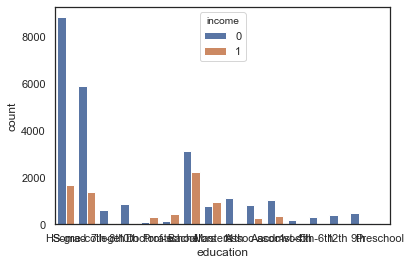

In [17]:
# doing data analysis:
sns.countplot(dataset['education'],hue=dataset['income'])
plt.show()

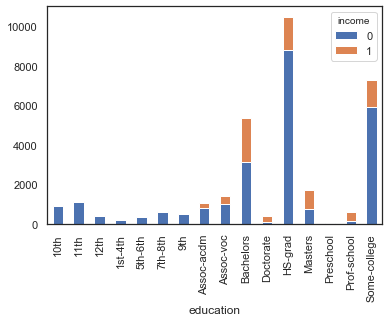

In [18]:
df_plot = dataset.groupby(['income', 'education']).size().reset_index().pivot(columns='income', index='education', values=0)
df_plot.plot(kind='bar', stacked=True)



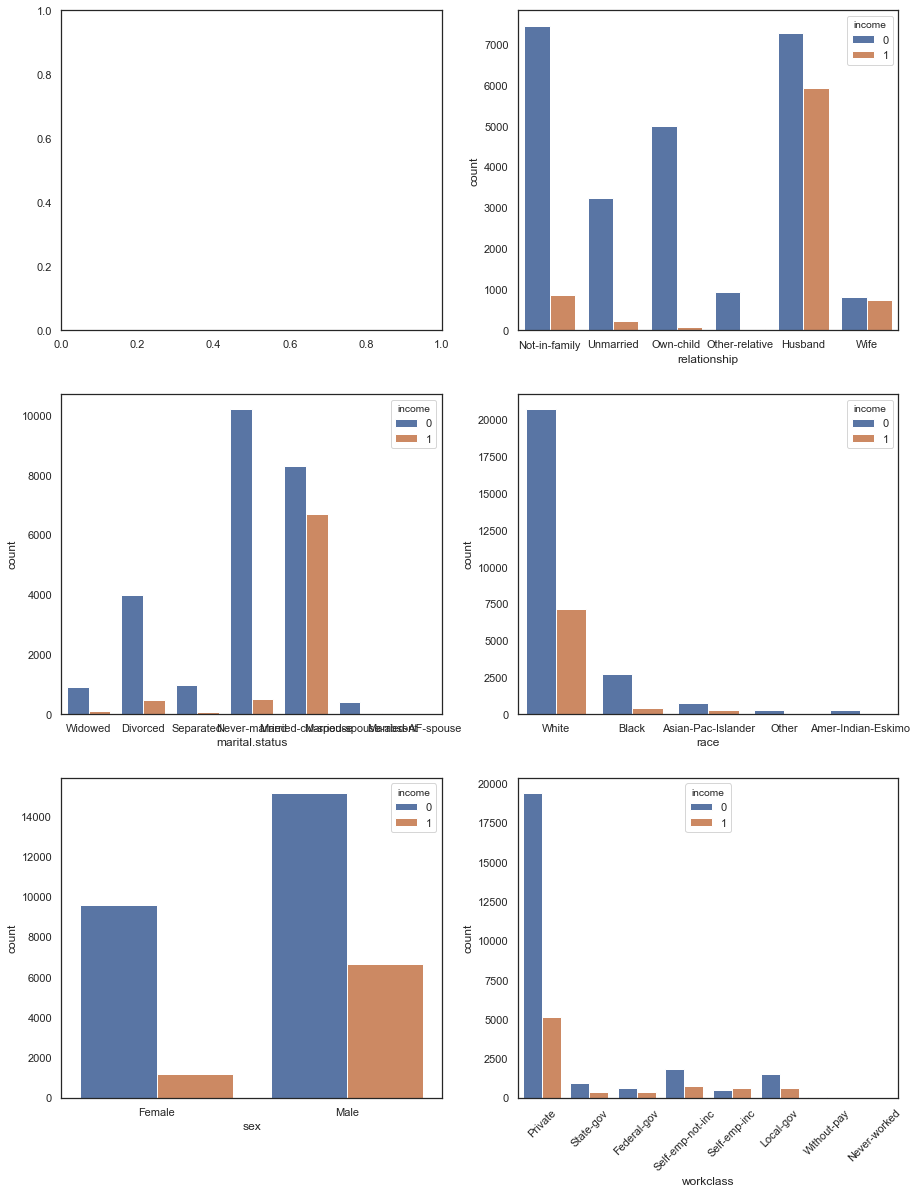

In [19]:
import seaborn as sns
fig, ((a,b),(c,d),(e,f)) = plt.subplots(3,2,figsize=(15,20))
plt.xticks(rotation=45)
sns.countplot(dataset['workclass'],hue=dataset['income'],ax=f)
sns.countplot(dataset['relationship'],hue=dataset['income'],ax=b)
sns.countplot(dataset['marital.status'],hue=dataset['income'],ax=c)
sns.countplot(dataset['race'],hue=dataset['income'],ax=d)
sns.countplot(dataset['sex'],hue=dataset['income'],ax=e)
#sns.countplot(dataset['native.country'],hue=dataset['income'],ax=a)


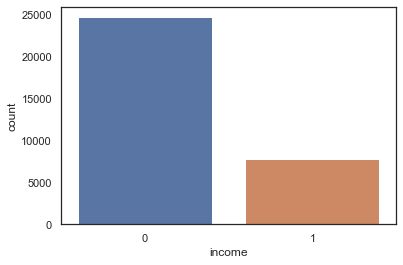

In [20]:
sns.countplot(dataset['income'],label="Count")
plt.show()


In [21]:
dataset.income.groupby(dataset.income).count() # count the unique numbers 

income
0    24720
1     7841
Name: income, dtype: int64

In [22]:
# Identify Numeric features
numeric_features = ['age','fnlwgt','education.num','capital.gain','capital.loss','hours.per.week']

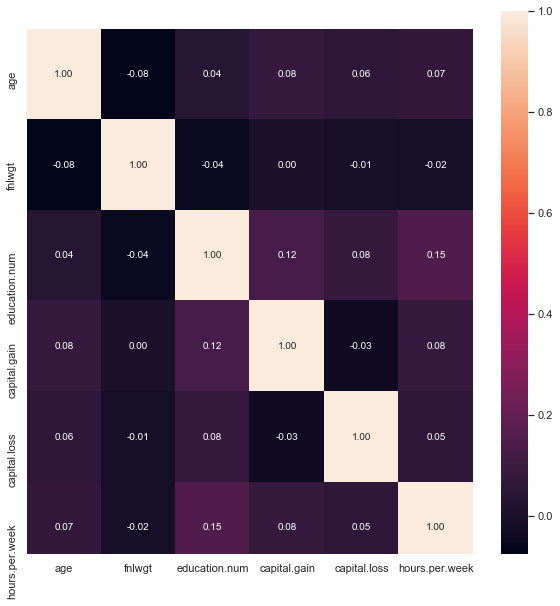

In [23]:
# do a correlation plot for numerical features
fig, ax = plt.subplots(figsize=(10,10))         # Sample figsize in inches
sns.heatmap(dataset[numeric_features].corr(), annot=True, fmt ='.2f')
ax.set_ylim(len(numeric_features)-0.2, -0.2) # heatmap visualization issue quick fix 
plt.show()


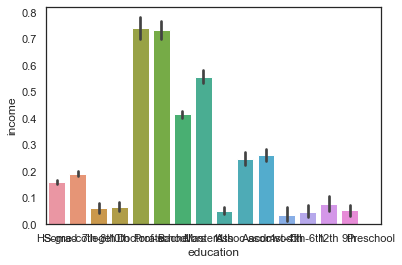

In [24]:
# Explore Education Num vs Income, education and income has a relationship
sns.barplot(dataset['education'], dataset['income'])


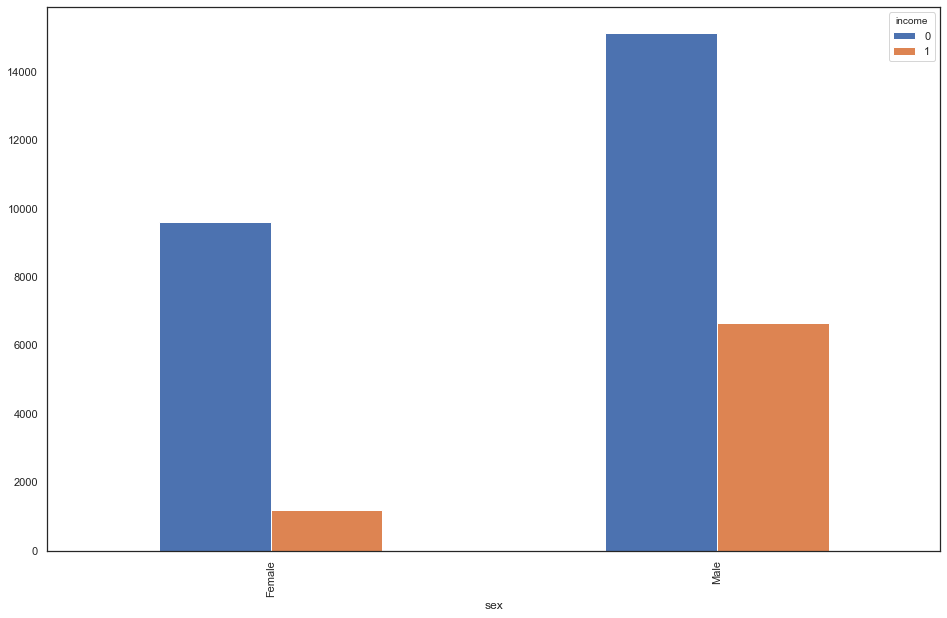

In [25]:
plt.rcParams['figure.figsize'] = [16, 10]

dataset.groupby(["income","sex"]).size().unstack("income").plot(kind='bar')



[Text(0, 0, 'Private'),
 Text(0, 0, 'State-gov'),
 Text(0, 0, 'Federal-gov'),
 Text(0, 0, 'Self-emp-not-inc'),
 Text(0, 0, 'Self-emp-inc'),
 Text(0, 0, 'Local-gov'),
 Text(0, 0, 'Without-pay'),
 Text(0, 0, 'Never-worked')]

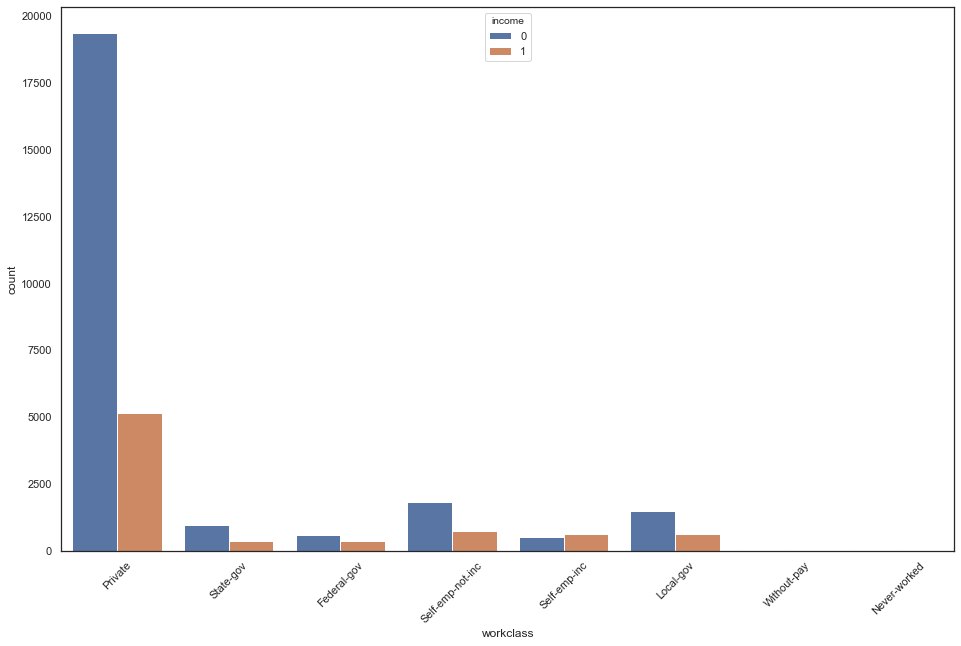

In [26]:
chart = sns.countplot(dataset['workclass'],hue=dataset['income'])
chart.set_xticklabels(chart.get_xticklabels(), rotation=45)


In [27]:
# A count plot can be thought of as a histogram across a categorical, 
# instead of quantitative, variable. 
# The basic API and options are identical to those for barplot(), 
# so you can compare counts across nested variables.

[Text(0, 0, '1'),
 Text(0, 0, '2'),
 Text(0, 0, '3'),
 Text(0, 0, '4'),
 Text(0, 0, '5'),
 Text(0, 0, '6'),
 Text(0, 0, '7'),
 Text(0, 0, '8'),
 Text(0, 0, '9'),
 Text(0, 0, '10'),
 Text(0, 0, '11'),
 Text(0, 0, '12'),
 Text(0, 0, '13'),
 Text(0, 0, '14'),
 Text(0, 0, '15'),
 Text(0, 0, '16')]

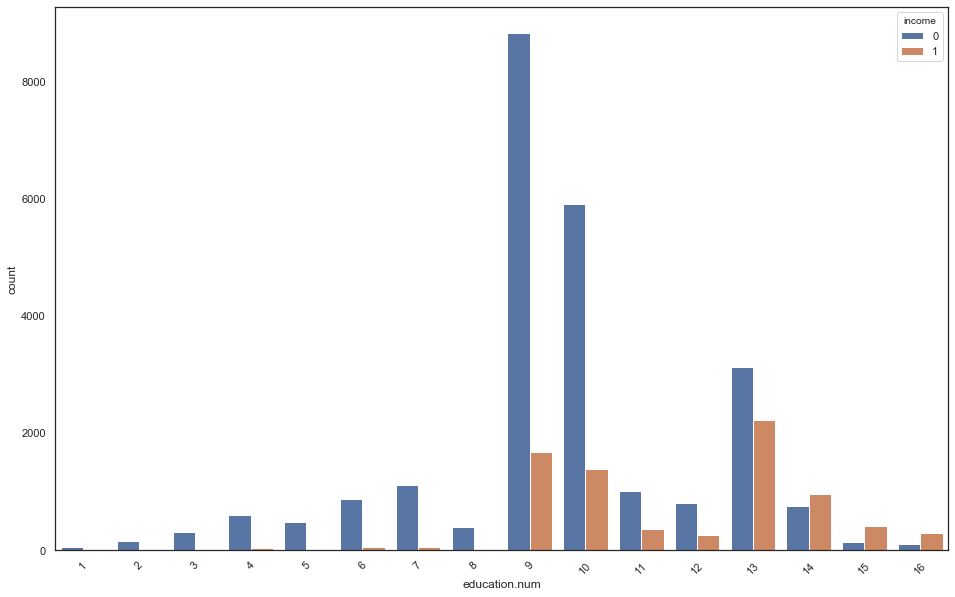

In [28]:
# histogram of the education level
chart = sns.countplot(dataset['education.num'],hue=dataset['income'])
chart.set_xticklabels(chart.get_xticklabels(), rotation=45)


In [29]:
dataset.income

0        0
1        0
2        0
3        0
4        0
        ..
32556    0
32557    0
32558    1
32559    0
32560    0
Name: income, Length: 32561, dtype: int64

[Text(0, 0.5, 'probability >=50K'), Text(0.5, 0, 'education.num')]

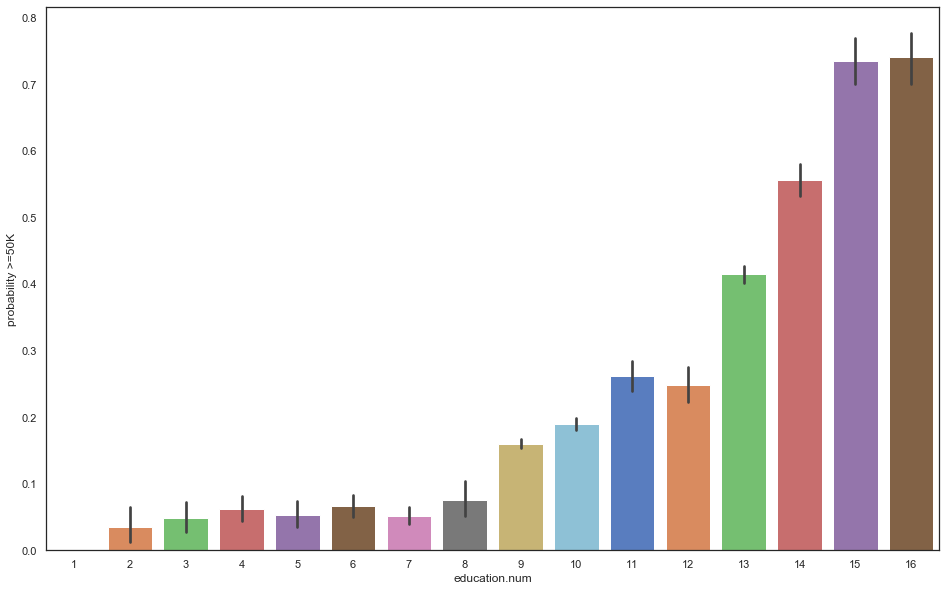

In [30]:
# Explore Education Num vs Income
# barplot x 对应的是 category， y对应的是numerical
g = sns.barplot(x="education.num",y="income", data=dataset, palette = "muted")
g.set(xlabel='education.num',ylabel='probability >=50K')


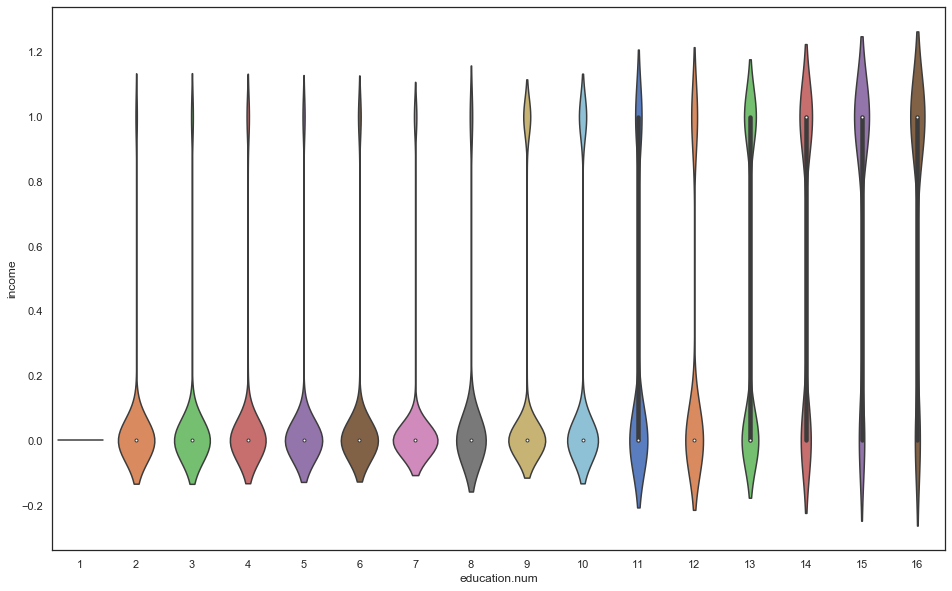

In [31]:
ax = sns.violinplot(x="education.num", y="income", data=dataset, palette="muted", split=True)

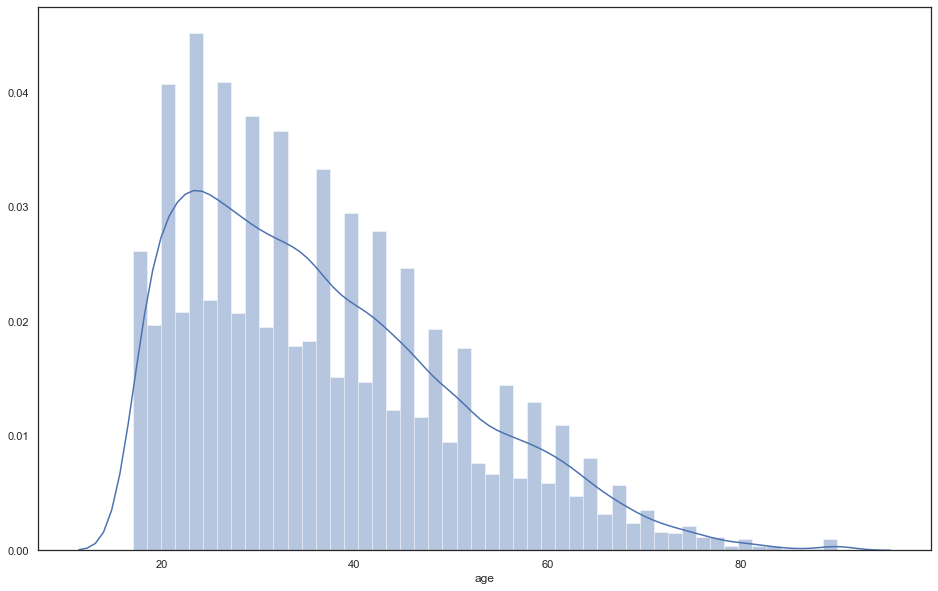

In [32]:
sns.distplot(dataset.age[dataset.income==0])

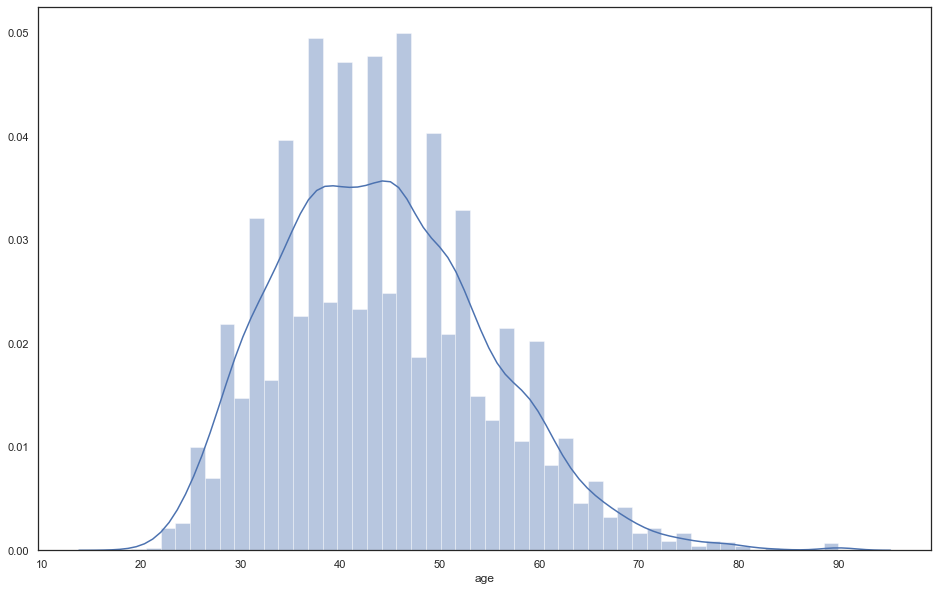

In [33]:
sns.distplot(dataset.age[dataset.income==1])

In [34]:
# categoritical data analysis

In [35]:
# Identify Categorical features
cat_features = ['workclass','education','marital.status', 'occupation', 'relationship', 'race', 'sex', 'native']

In [36]:
dataset["workclass"].isnull().sum()

0

In [37]:
dataset.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64

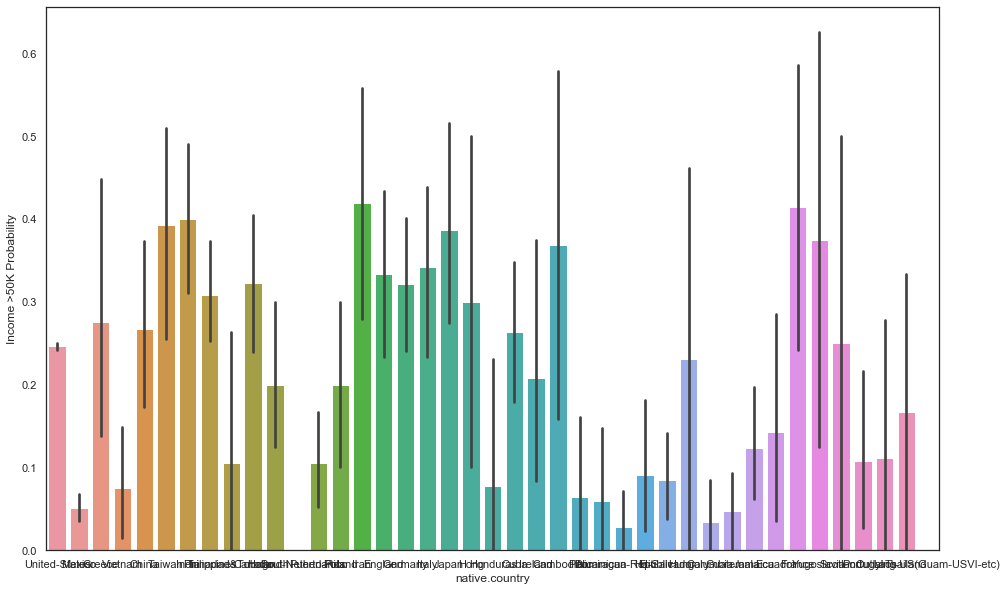

In [38]:
# explore native nation vs.income
g = sns.barplot(x="native.country",y="income",data=dataset)
g = g.set_ylabel("Income >50K Probability")
plt.show()

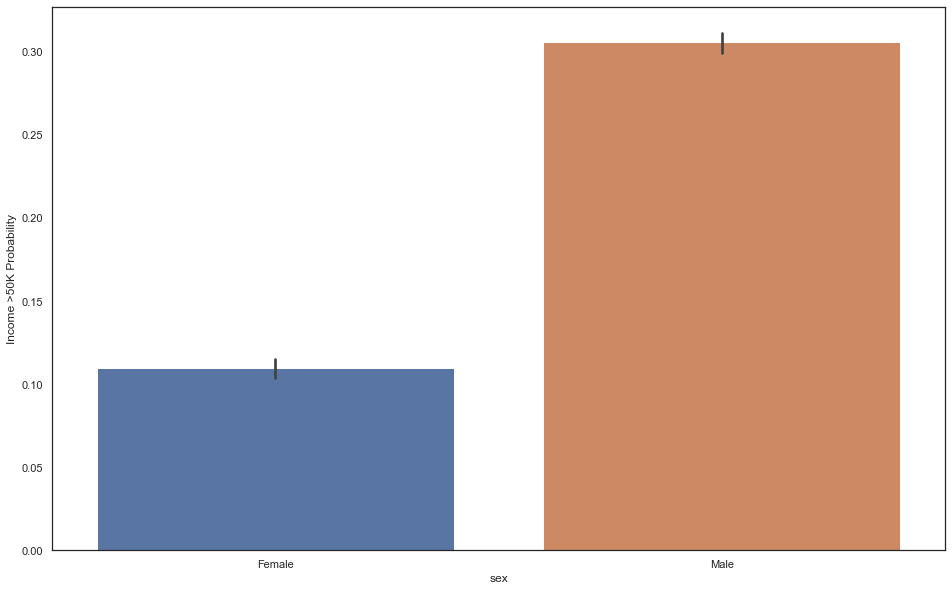

In [39]:
# Explore Sex vs Income
g = sns.barplot(x="sex",y="income",data=dataset)
g = g.set_ylabel("Income >50K Probability")
plt.show()

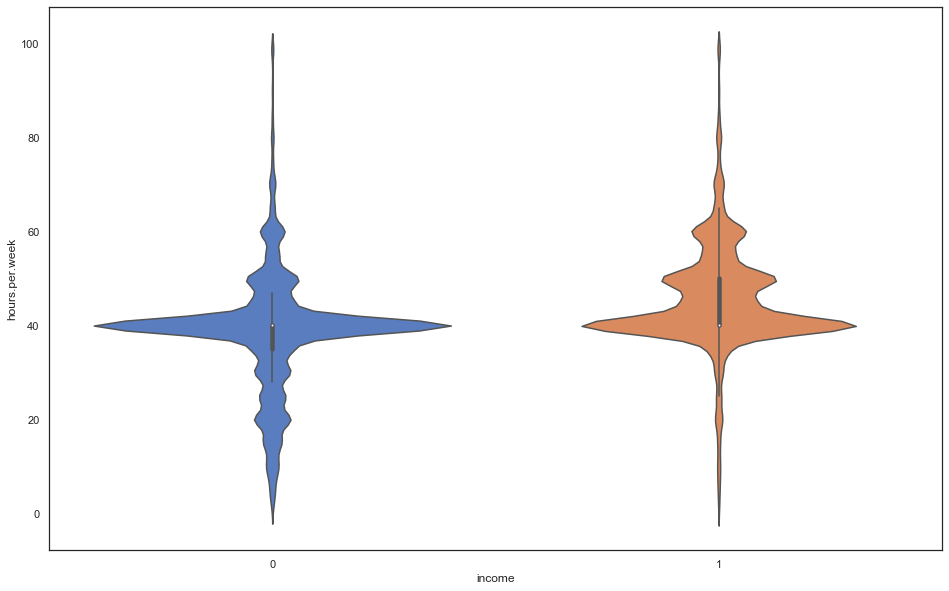

In [40]:
ax = sns.violinplot(x='income', y="hours.per.week", data=dataset, palette="muted", split=True)

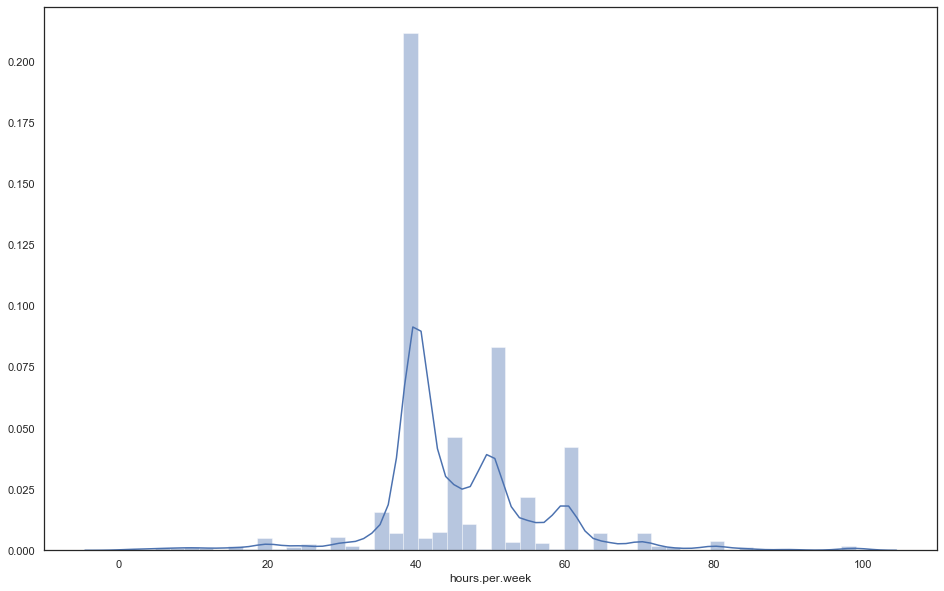

In [41]:
sns.distplot(dataset["hours.per.week"][dataset.income==1])

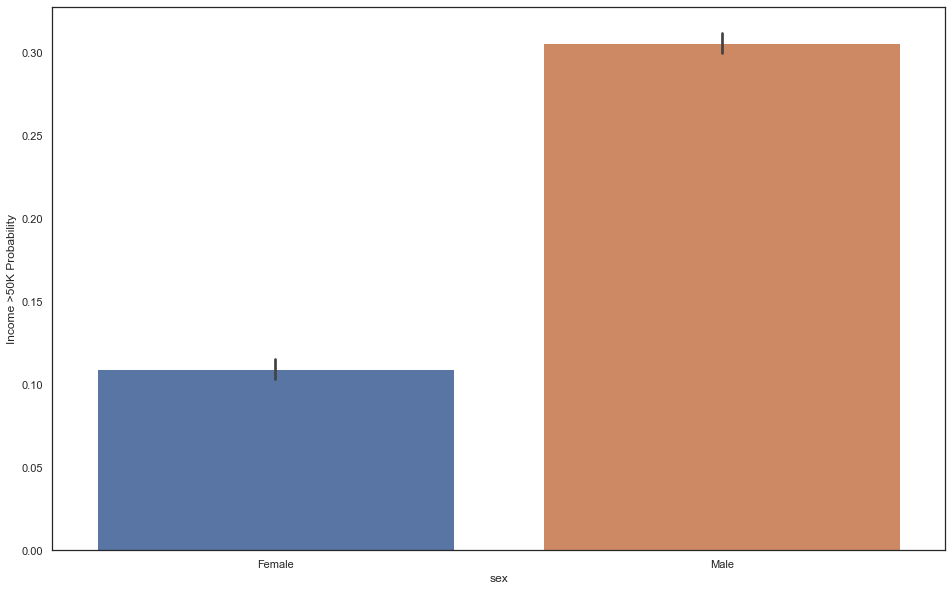

In [42]:
# Explore Sex vs Income
g = sns.barplot(x="sex",y="income",data=dataset)
g = g.set_ylabel("Income >50K Probability")
plt.show()

/Users/fangche@cisco.com/Library/Python/3.7/lib/python/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/Users/fangche@cisco.com/Library/Python/3.7/lib/python/site-packages/seaborn/categorical.py:3672: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


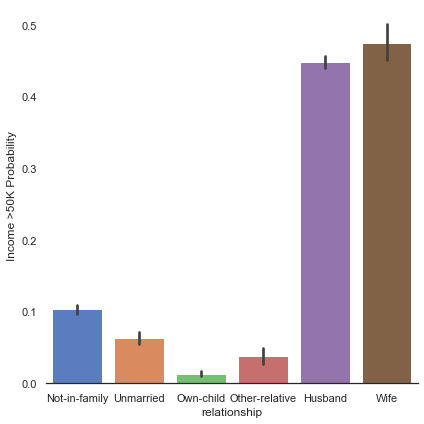

In [43]:
# Explore Relationship vs Income
g = sns.factorplot(x="relationship",y="income",data=dataset,kind="bar", size = 6 ,
palette = "muted")
g.despine(left=True)
g = g.set_ylabels("Income >50K Probability")
plt.show()

/Users/fangche@cisco.com/Library/Python/3.7/lib/python/site-packages/seaborn/categorical.py:3692: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


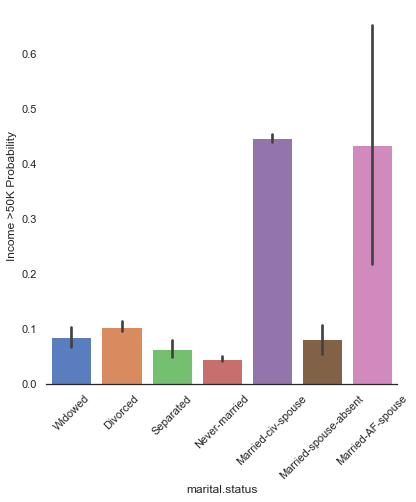

In [44]:
# Explore Marital Status vs Income
g = sns.catplot(x="marital.status",y="income",data=dataset,kind="bar", size = 6 ,
palette = "muted")
g.despine(left=True)
g = g.set_ylabels("Income >50K Probability")
g.set_xticklabels(rotation=45)
plt.show()

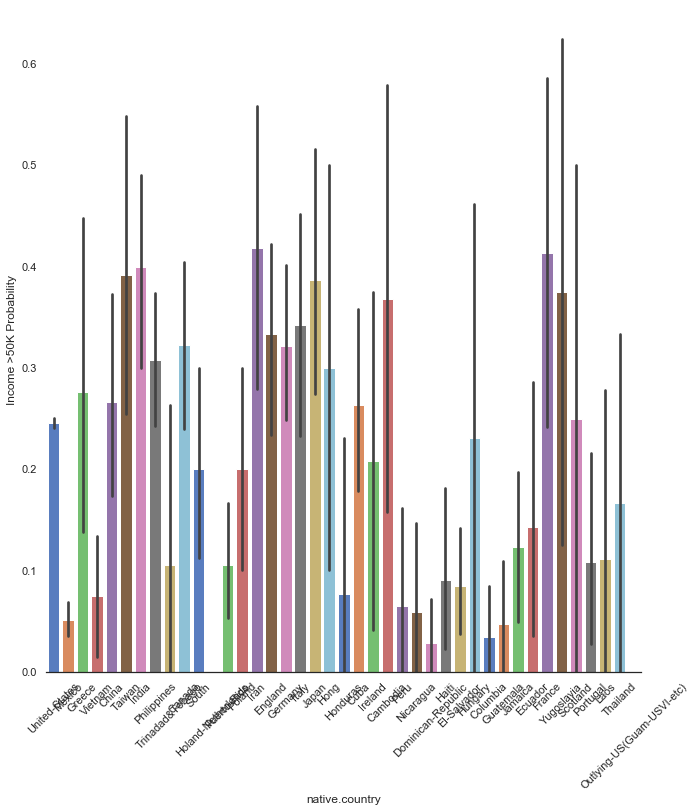

In [45]:
g = sns.catplot(x="native.country",y="income",data=dataset,kind="bar", size = 10 ,
palette = "muted")
g.despine(left=True)
g = g.set_ylabels("Income >50K Probability")
g.set_xticklabels(rotation=45)
plt.show()

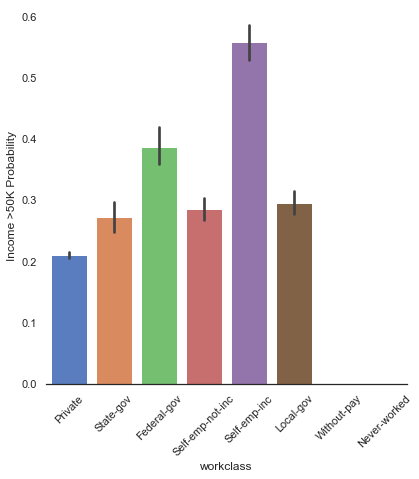

In [46]:
# Explore Workclass vs Income
g = sns.factorplot(x="workclass",y="income",data=dataset,kind="bar", size = 6 ,
palette = "muted")
g.despine(left=True)
g.set_xticklabels(rotation=45)
g = g.set_ylabels("Income >50K Probability")
plt.show()

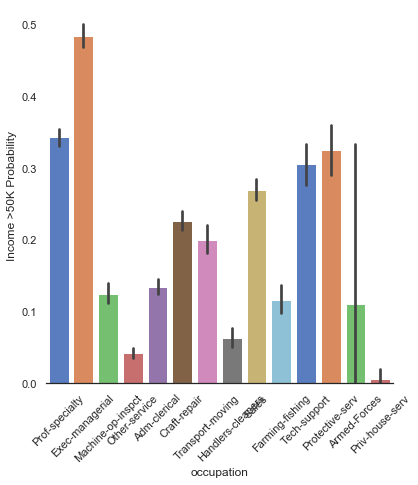

In [47]:
# Explore Workclass vs Income
g = sns.factorplot(x="occupation",y="income",data=dataset,kind="bar", size = 6 ,
palette = "muted")
g.despine(left=True)
g.set_xticklabels(rotation=45)
g = g.set_ylabels("Income >50K Probability")
plt.show()

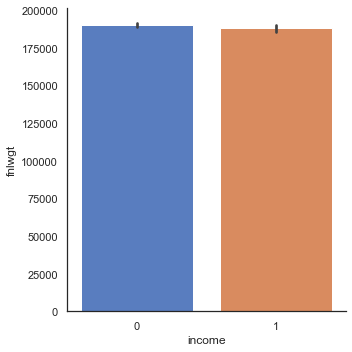

In [48]:
sns.catplot(x='income', y='fnlwgt', data=dataset, kind='bar', palette="muted")
plt.show()

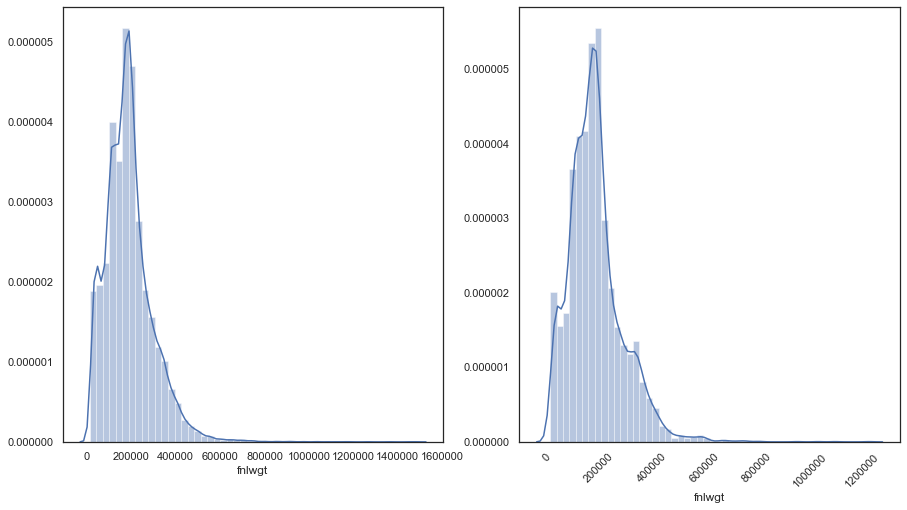

In [49]:
fig, ((a,b)) = plt.subplots(1,2,figsize=(15,8))
plt.xticks(rotation=45)
sns.distplot(dataset["fnlwgt"][dataset.income==0], ax=a)
sns.distplot(dataset["fnlwgt"][dataset.income==1], ax=b)



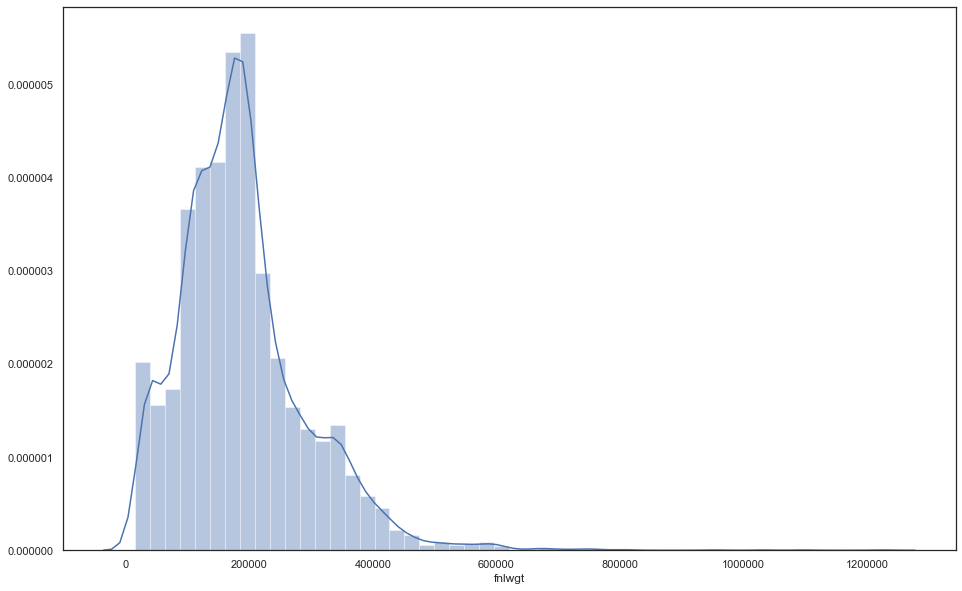

In [50]:
sns.distplot(dataset["fnlwgt"][dataset.income==1])

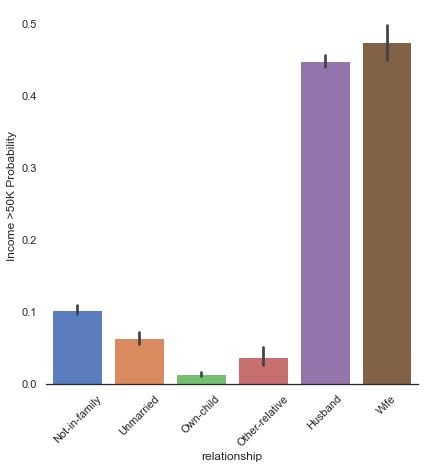

In [51]:
g = sns.factorplot(x="relationship",y="income",data=dataset, kind="bar", size = 6 ,
palette = "muted")
g.despine(left=True)
g.set_xticklabels(rotation=45)
g = g.set_ylabels("Income >50K Probability")
plt.show()

In [52]:
# convert sex to 0-1 
dataset['sex'] = dataset['sex'].map({'Male':0,'Female':1,})
Single =['Widowed', 'Divorced', 'Separated', 'Never-married','Married-spouse-absent']
Married = ['Married-civ-spouse','Married-AF-spouse']
for x in married:
    dataset['marital.status'][dataset['marital.status']==x]= 'Married'
for x in single:
    dataset['marital.status'][dataset['marital.status']==x]= 'Single'

dataset['marital.status']=dataset['marital.status'].map({'Single':0,'Married':1})

NameError: name 'married' is not defined

In [58]:
dataset.age.iloc[0]

90

In [60]:
[20*x for x in range(6)]

[0, 20, 40, 60, 80, 100]

In [63]:
pd.cut(x=dataset['age'], bins=[0, 19, 29, 39, 49, 59, 69,100], labels=['below20s', '20s', '30s', '40s', '50s', '60s', 'above60s'])

0        above60s
1        above60s
2             60s
3             50s
4             40s
           ...   
32556         20s
32557         20s
32558         40s
32559         50s
32560         20s
Name: age, Length: 32561, dtype: category
Categories (7, object): [below20s < 20s < 30s < 40s < 50s < 60s < above60s]

In [281]:
dataset['workclass'].unique()

array(['Private', 'State-gov', 'Federal-gov', 'Self-emp-not-inc',
       'Self-emp-inc', 'Local-gov', 'Without-pay', 'Never-worked'],
      dtype=object)

In [282]:
dataset['workclass'] = dataset['workclass'].map({'Private':0, 'State-gov':1, 'Federal-gov':2, 'Self-emp-not-inc':2,
       'Self-emp-inc':4, 'Local-gov':5, 'Without-pay':6, 'Never-worked':7})

In [283]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
dataset['occupation.num'] = le.fit_transform(dataset['occupation'])
dataset['country.num'] = le.fit_transform(dataset['native.country'])
dataset['race'] = le.fit_transform(dataset['race'])
dataset['relationship.num'] = le.fit_transform(dataset['relationship'])

In [284]:
dataset.head(10)

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income,occupation.num,country.num,relationship.num
0,90,0,77053,HS-grad,9,1,Prof-specialty,Not-in-family,4,1,0,4356,40,United-States,0,9,38,1
1,82,0,132870,HS-grad,9,1,Exec-managerial,Not-in-family,4,1,0,4356,18,United-States,0,3,38,1
2,66,0,186061,Some-college,10,1,Prof-specialty,Unmarried,2,1,0,4356,40,United-States,0,9,38,4
3,54,0,140359,7th-8th,4,1,Machine-op-inspct,Unmarried,4,1,0,3900,40,United-States,0,6,38,4
4,41,0,264663,Some-college,10,1,Prof-specialty,Own-child,4,1,0,3900,40,United-States,0,9,38,3
5,34,0,216864,HS-grad,9,1,Other-service,Unmarried,4,1,0,3770,45,United-States,0,7,38,4
6,38,0,150601,10th,6,1,Adm-clerical,Unmarried,4,0,0,3770,40,United-States,0,0,38,4
7,74,1,88638,Doctorate,16,1,Prof-specialty,Other-relative,4,1,0,3683,20,United-States,1,9,38,2
8,68,2,422013,HS-grad,9,1,Prof-specialty,Not-in-family,4,1,0,3683,40,United-States,0,9,38,1
9,41,0,70037,Some-college,10,1,Craft-repair,Unmarried,4,0,0,3004,60,United-States,1,2,38,4


In [285]:
dataset.columns


Index(['age', 'workclass', 'fnlwgt', 'education', 'education.num',
       'marital.status', 'occupation', 'relationship', 'race', 'sex',
       'capital.gain', 'capital.loss', 'hours.per.week', 'native.country',
       'income', 'occupation.num', 'country.num', 'relationship.num'],
      dtype='object')

In [286]:
feature = ['age', 'workclass', 'fnlwgt', 'education.num',
       'marital.status', 'relationship.num', 'race', 'sex',
       'capital.gain', 'capital.loss', 'hours.per.week', 'country.num', 'occupation.num', 'income']
data = dataset[feature]

In [287]:
dataset

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income,occupation.num,country.num,relationship.num
0,90,0,77053,HS-grad,9,1,Prof-specialty,Not-in-family,4,1,0,4356,40,United-States,0,9,38,1
1,82,0,132870,HS-grad,9,1,Exec-managerial,Not-in-family,4,1,0,4356,18,United-States,0,3,38,1
2,66,0,186061,Some-college,10,1,Prof-specialty,Unmarried,2,1,0,4356,40,United-States,0,9,38,4
3,54,0,140359,7th-8th,4,1,Machine-op-inspct,Unmarried,4,1,0,3900,40,United-States,0,6,38,4
4,41,0,264663,Some-college,10,1,Prof-specialty,Own-child,4,1,0,3900,40,United-States,0,9,38,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,0,310152,Some-college,10,1,Protective-serv,Not-in-family,4,0,0,0,40,United-States,0,10,38,1
32557,27,0,257302,Assoc-acdm,12,0,Tech-support,Wife,4,1,0,0,38,United-States,0,12,38,5
32558,40,0,154374,HS-grad,9,0,Machine-op-inspct,Husband,4,0,0,0,40,United-States,1,6,38,0
32559,58,0,151910,HS-grad,9,1,Adm-clerical,Unmarried,4,1,0,0,40,United-States,0,0,38,4


Start to do modeling, 

In [288]:
data = data.values # change data to a 2 dimensional array

In [289]:
data.shape

(32561, 14)

In [290]:
X = data[:, 0:13] # way to select data
Y = data[:,-1] 

In [291]:
X

array([[    90,      0,  77053, ...,     40,     38,      9],
       [    82,      0, 132870, ...,     18,     38,      3],
       [    66,      0, 186061, ...,     40,     38,      9],
       ...,
       [    40,      0, 154374, ...,     40,     38,      6],
       [    58,      0, 151910, ...,     40,     38,      0],
       [    22,      0, 201490, ...,     20,     38,      0]])

In [292]:
validation_size = 0.20 # 20% of data is used for validation
seed = 1
num_folds = 10
scoring = 'accuracy'
X_train, X_validation, Y_train, Y_validation = train_test_split(X,Y, test_size=validation_size, random_state=seed)

In [293]:
X_train

array([[    34,      1, 180871, ...,     55,     38,      0],
       [    26,      0, 161007, ...,     30,     38,      0],
       [    38,      2, 261382, ...,     40,     38,     13],
       ...,
       [    49,      0, 134797, ...,     40,     38,      0],
       [    65,      2,  23494, ...,     40,     38,      3],
       [    31,      2, 234537, ...,     60,     38,      2]])

In [294]:
num_trees = 100
max_features = 3

models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('RF', RandomForestClassifier(n_estimators=num_trees, max_features=max_features)))

In [295]:
results = []
names = []
for name, model in models:
    kfold = KFold(n_splits=10, random_state=seed)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

/Users/fangche@cisco.com/Library/Python/3.7/lib/python/site-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
/Users/fangche@cisco.com/Library/Python/3.7/lib/python/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/Users/fangche@cisco.com/Library/Python/3.7/lib/python/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs f

LR: 0.789888 (0.007027)
LDA: 0.831580 (0.006910)


/Users/fangche@cisco.com/Library/Python/3.7/lib/python/site-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


KNN: 0.773380 (0.008496)


/Users/fangche@cisco.com/Library/Python/3.7/lib/python/site-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


CART: 0.808162 (0.007630)
NB: 0.795224 (0.011518)


/Users/fangche@cisco.com/Library/Python/3.7/lib/python/site-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
/Users/fangche@cisco.com/Library/Python/3.7/lib/python/site-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


RF: 0.856112 (0.007588)


In [296]:
results

[array([0.79884837, 0.78618042, 0.77581574, 0.80191939, 0.79040307,
        0.79078695, 0.79001919, 0.79078695, 0.79147465, 0.78264209]),
 array([0.8452975 , 0.82955854, 0.82725528, 0.83570058, 0.83570058,
        0.82495202, 0.83109405, 0.83800384, 0.81989247, 0.82834101]),
 array([0.78119002, 0.77044146, 0.76238004, 0.78387716, 0.76429942,
        0.76852207, 0.78464491, 0.77619962, 0.78033794, 0.76190476]),
 array([0.8184261 , 0.78963532, 0.80307102, 0.81113244, 0.80652591,
        0.80422265, 0.81420345, 0.81420345, 0.81029186, 0.80990783]),
 array([0.80652591, 0.79232246, 0.77965451, 0.81305182, 0.79270633,
        0.78272553, 0.80806142, 0.80345489, 0.7937788 , 0.77995392]),
 array([0.86833013, 0.85067179, 0.84913628, 0.86679463, 0.85489443,
        0.84644914, 0.86333973, 0.84836852, 0.85291859, 0.86021505])]

In [297]:
np.average(results, axis=1)

array([0.78988768, 0.83157959, 0.77337974, 0.808162  , 0.79522356,
       0.85611183])

In [298]:
# random forest is the best out of all
random_forest = RandomForestClassifier(n_estimators=250,max_features=5)
random_forest.fit(X_train, Y_train)
predictions = random_forest.predict(X_validation)
print("Accuracy: %s%%" % (100*accuracy_score(Y_validation, predictions)))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

Accuracy: 86.35037617073546%
[[4617  326]
 [ 563 1007]]
              precision    recall  f1-score   support

           0       0.89      0.93      0.91      4943
           1       0.76      0.64      0.69      1570

    accuracy                           0.86      6513
   macro avg       0.82      0.79      0.80      6513
weighted avg       0.86      0.86      0.86      6513



In [299]:
[feature_name[i] for i in sorted_idx]

['sex',
 'race',
 'country.num',
 'workclass',
 'capital.loss',
 'occupation.num',
 'hours.per.week',
 'relationship.num',
 'marital.status',
 'capital.gain',
 'education.num',
 'age',
 'fnlwgt']

In [300]:
sorted_idx[0]

7

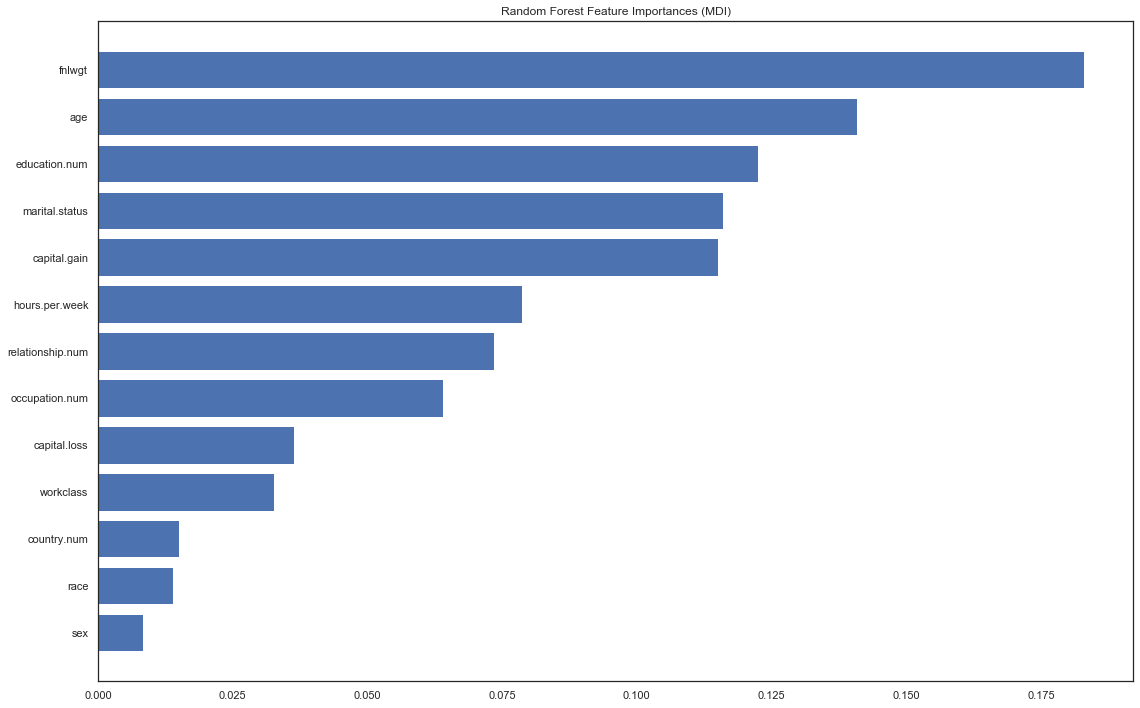

In [301]:
# get feature importance from random forest
importances = random_forest.feature_importances_
sorted_idx = importances.argsort()
feature_names = feature[:13]
feature_names0 = [feature_names[i] for i in sorted_idx]

y_ticks = np.arange(0, len(sorted_idx))
fig, ax = plt.subplots()
ax.barh(y_ticks, importances[sorted_idx])
ax.set_yticklabels(feature_names0)
ax.set_yticks(y_ticks)
ax.set_title("Random Forest Feature Importances (MDI)")
fig.tight_layout()
plt.show()

In [302]:
n_estimators = np.array([50,100,150,200,250])
max_features = np.array([1,2,3,4,5])
param_grid = dict(n_estimators=n_estimators,max_features=max_features)
param_grid

{'n_estimators': array([ 50, 100, 150, 200, 250]),
 'max_features': array([1, 2, 3, 4, 5])}

In [303]:
model = RandomForestClassifier()
kfold = KFold(n_splits=num_folds, random_state=seed)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(X_train, Y_train)
print(grid_result)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

/Users/fangche@cisco.com/Library/Python/3.7/lib/python/site-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


GridSearchCV(cv=KFold(n_splits=10, random_state=1, shuffle=False),
             error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_sco

/Users/fangche@cisco.com/Library/Python/3.7/lib/python/site-packages/sklearn/inspection/_partial_dependence.py:926: UserWarning: No contour levels were found within the data range.
  colors='k')


ValueError: Contour levels must be increasing

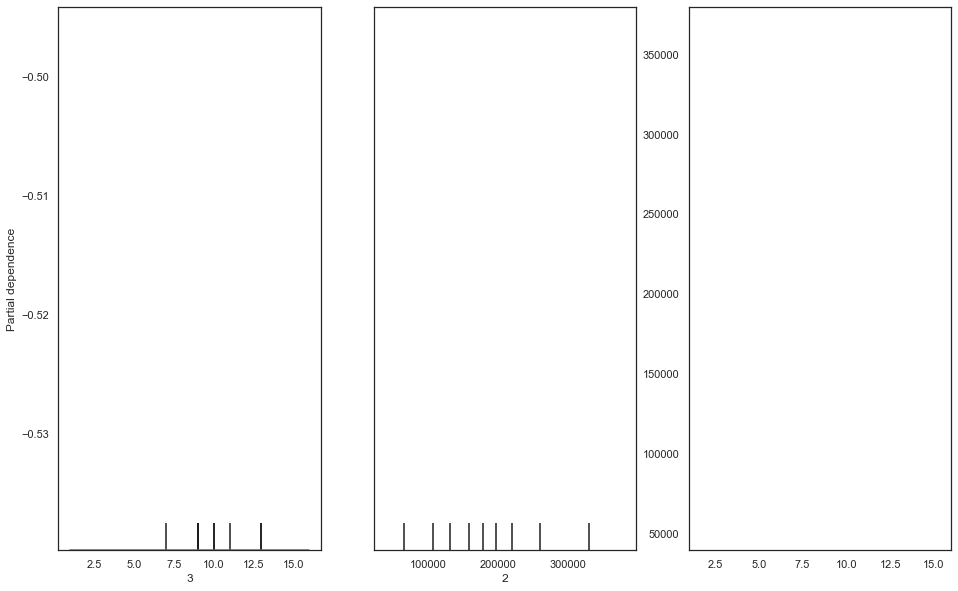

In [305]:
from sklearn.datasets import load_iris
from sklearn.inspection import plot_partial_dependence

iris = load_iris()
mc_clf = GradientBoostingClassifier(n_estimators=10,
    max_depth=1).fit(iris.data, iris.target)
features = [3, 2, (3, 2)]
plot_partial_dependence(mc_clf, X, features, target=0) 